## Задание по визуализации данных: 
- Распределение клиентов по возрасту в течение времени
- Конверсия клиентов в зависимости от возраста
- Зависимость размера первой покупки от скорости утилизации

In [23]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pandas import ExcelWriter
from pandas import ExcelFile
import numpy as np

In [24]:
df = pd.read_excel('table1.xls')

In [25]:
df.head(10)

,client_id,birth_dt,reg_dttm,purchase_id,purchase_dt,purchase_amt
0,820519,1990-05-10,2019-01-02 12:49:39,NaN,NaT,NaN
1,820521,1970-03-23,2019-01-02 14:14:39,NaN,NaT,NaN
2,820523,1991-04-01,2019-01-02 19:51:19,1.204926e+09,2019-02-12,500.0
3,820526,1985-04-27,2019-01-02 18:09:39,NaN,NaT,NaN
4,820544,1991-05-03,2019-01-03 12:24:42,NaN,NaT,NaN
5,820552,1999-04-01,2019-01-03 18:04:45,NaN,NaT,NaN
6,820561,1993-10-22,2019-01-04 14:39:43,1.205778e+09,2019-02-13,500.0
7,820562,1981-08-17,2019-01-04 13:46:59,NaN,NaT,NaN
8,820588,1984-11-17,2019-01-04 21:41:25,NaN,NaT,NaN
9,820598,1980-12-02,2019-01-05 00:54:46,NaN,NaT,NaN


In [26]:
len(df['client_id'].unique())

2099

In [27]:
#Преобразуем тип client_id в int
def to_int(val):
    if not pd.isna(val):
        return int(val)
df['purchase_id'] = df["purchase_id"].apply(to_int).fillna(0)
df['purchase_id']

0       0.000000e+00
1       0.000000e+00
2       1.204926e+09
3       0.000000e+00
4       0.000000e+00
            ...     
2372    0.000000e+00
2373    1.299279e+09
2374    1.299387e+09
2375    0.000000e+00
2376    0.000000e+00
Name: purchase_id, Length: 2377, dtype: float64

In [29]:
# Добавляем колонку возраста клиентов age (просто вычтем года)
df['age'] = df['reg_dttm'].dt.year - df['birth_dt'].dt.year
df.head(5)

,client_id,birth_dt,reg_dttm,purchase_id,purchase_dt,purchase_amt,age
0,820519,1990-05-10,2019-01-02 12:49:39,0.000000e+00,NaT,NaN,29
1,820521,1970-03-23,2019-01-02 14:14:39,0.000000e+00,NaT,NaN,49
2,820523,1991-04-01,2019-01-02 19:51:19,1.204926e+09,2019-02-12,500.0,28
3,820526,1985-04-27,2019-01-02 18:09:39,0.000000e+00,NaT,NaN,34
4,820544,1991-05-03,2019-01-03 12:24:42,0.000000e+00,NaT,NaN,28


In [39]:
#строим 3 таблицы с разными возрастными группами, где группируемзначения по дате с частотой - месяц,
#считаем количество клиентов 
df_less_then_25 = df[df.age<25].groupby(pd.Grouper(key="reg_dttm", freq="M")).agg({'age': ['count']})
df_less_then_25

df_25_35 = df[(df.age>=25) & (df.age<=35)].groupby(pd.Grouper(key="reg_dttm", freq="M")).agg({'age': ['count']})
df_25_35.head()

df_more_then_35 = df[df.age>35].groupby(pd.Grouper(key="reg_dttm", freq="M")).agg({'age': ['count']})
df_more_then_35.head()


,age
,count
reg_dttm,
2019-01-31,210
2019-02-28,241
2019-03-31,119
2019-04-30,3


<ipython-input-31-3e159a301731>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', 'Yan', '',  'Feb', '',  'Mar','',  'Apr', ''])


Text(0.5, 1.0, 'Распределение клиентов по возрасту в течение времени')

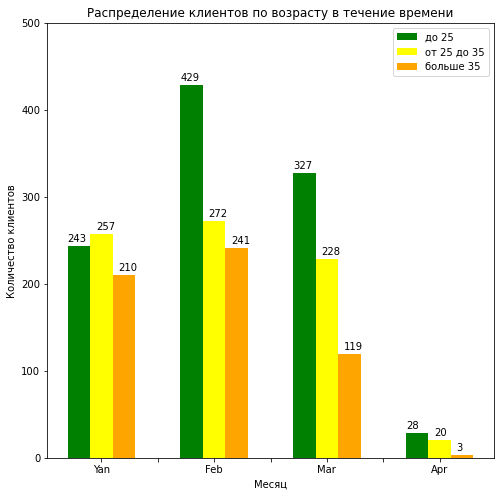

In [31]:
#Строим графики (значения по осям не автоматизированы, надо было словарь завести)
fig, ax = plt.subplots(figsize = (8,8))
x = np.linspace(1, 4, 4)

ax.bar(x-0.2, df_less_then_25['age'].squeeze(), width = 0.2, color = 'green', label = 'до 25')

ax.bar(x, df_25_35['age'].squeeze(), width = 0.2, color = 'yellow', label = 'от 25 до 35')

ax.bar(x+0.2, df_more_then_35['age'].squeeze(), width = 0.2, color = 'orange', label = 'больше 35')

for i in range(len(x)):
    plt.text(x[i]-0.3, int(df_less_then_25.iloc[i]['age'])+5, str(int(df_less_then_25.iloc[i]['age'])))
    plt.text(x[i]-0.05, int(df_25_35.iloc[i]['age'])+5, str(int(df_25_35.iloc[i]['age'])))
    plt.text(x[i]+0.15, int(df_more_then_35.iloc[i]['age'])+5, str(int(df_more_then_35.iloc[i]['age'])))

plt.xlabel('Месяц')
plt.ylabel('Количество клиентов')
ax.legend()
ax.set_ylim(0, 500)
ax.set_xticklabels(['', 'Yan', '',  'Feb', '',  'Mar','',  'Apr', ''])
ax.set_title("Распределение клиентов по возрасту в течение времени")

In [32]:
# Находим конверсии (%)
df1 = df[(df['purchase_id'] != 0) & (df['age']<25)]

df2 = df[(df['purchase_id'] != 0) & (df['age']>=25) & (df['age'] <= 35)]

df3 = df[(df['purchase_id'] != 0) & (df['age']>35) ]

conversion = [(df1['client_id'].count()/int(df_less_then_25['age'].sum())).round(3)*100, 
              (df2['client_id'].count()/int(df_25_35['age'].sum())).round(3)*100,
              (df3['client_id'].count()/int(df_more_then_35['age'].sum())).round(3)*100]
conversion

[54.0, 50.1, 51.5]

<ipython-input-40-4a4248db41aa>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', 'меньше 25 лет', '25 - 35 лет', 'больше 35 лет'])


Text(2.9, 52.5, '51.5')

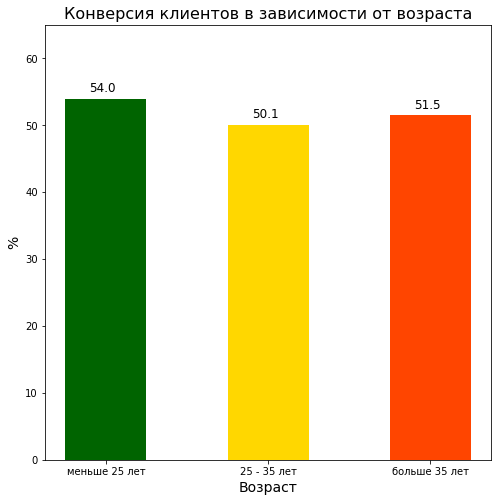

In [40]:
import matplotlib.ticker as ticker

x = np.linspace(1, len(conversion), len(conversion))

fig, ax = plt.subplots(figsize = (8,8))

ax.bar(x, conversion, color = ['#006400', '#FFD700', '#FF4500'], width = 0.5)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_xticklabels(['', 'меньше 25 лет', '25 - 35 лет', 'больше 35 лет'])
ax.set_ylim(0, 65)
ax.set_title("Конверсия клиентов в зависимости от возраста", fontsize = 16)

plt.xlabel('Возраст', fontsize = 14)
plt.ylabel('%', fontsize = 14)
plt.text(x[0]-0.1, conversion[0]+1, str(conversion[0]), fontsize = 12)
plt.text(x[1]-0.1, conversion[1]+1, str(conversion[1]), fontsize = 12)
plt.text(x[2]-0.1, conversion[2]+1, str(conversion[2]), fontsize = 12)


In [41]:
import datetime

df22 = df[df['purchase_dt'].notna()]
df22.info()

#Удаление дубликатов
mask = df22.duplicated(subset="client_id", keep = 'first') 
df2 = df22.loc[~mask]
df2.info()

#Создаем столбец со скоростью утилизации (количество дней)
df2['speed'] = df2.purchase_dt - pd.to_datetime(df2.reg_dttm, format = '%Y-%m-%d')
df2['speed'] = df2['speed'].dt.days

# Округляем количество дней
df2['speed'] = np.where((df2.speed == 0), 1, df2.speed)
df2.loc[(df2.speed == -1), 'speed'] = 0
df2_sum = df2.groupby('speed')['purchase_amt'].sum()
df2_mean = df2.groupby('speed')['purchase_amt'].mean()
df2_mean

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1239 entries, 2 to 2374
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   client_id     1239 non-null   int64         
 1   birth_dt      1239 non-null   datetime64[ns]
 2   reg_dttm      1239 non-null   datetime64[ns]
 3   purchase_id   1239 non-null   float64       
 4   purchase_dt   1239 non-null   datetime64[ns]
 5   purchase_amt  1239 non-null   float64       
 6   age           1239 non-null   int64         
dtypes: datetime64[ns](3), float64(2), int64(2)
memory usage: 77.4 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 961 entries, 2 to 2374
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   client_id     961 non-null    int64         
 1   birth_dt      961 non-null    datetime64[ns]
 2   reg_dttm      961 non-null    datetime64[ns]
 3   purchase_id   

<ipython-input-41-a696fa64cfbb>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['speed'] = df2.purchase_dt - pd.to_datetime(df2.reg_dttm, format = '%Y-%m-%d')
<ipython-input-41-a696fa64cfbb>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['speed'] = df2['speed'].dt.days
<ipython-input-41-a696fa64cfbb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

speed
0     3785.714286
1     2689.024390
2     2853.658537
3     2666.666667
4     3209.302326
         ...     
74    4500.000000
75    4000.000000
76    3000.000000
81    1000.000000
87     500.000000
Name: purchase_amt, Length: 72, dtype: float64

In [35]:
# Переводим во фрейм
df2_mean_ = df2_mean.to_frame()
df2_mean_


,purchase_amt
speed,
0,3785.714286
1,2689.024390
2,2853.658537
3,2666.666667
4,3209.302326
...,...
74,4500.000000
75,4000.000000
76,3000.000000


In [36]:
# разделяем на группы с интрервалом 5 дней
cut_bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 87]
df2_mean_['cut'] = pd.cut(df2_mean_.index,
                       bins=cut_bins,
                        labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65', '65-70', '70-75', '75-80', '80-87'])
df2_final = df2_mean_.groupby(df2_mean_.cut).mean()
df2_final.purchase_amt.round(2)


cut
0-5      2840.25
5-10     3255.32
10-15    3195.09
15-20    3118.45
20-25    3237.85
25-30    3233.56
30-35    2887.30
35-40    3608.10
40-45    2410.00
45-50    3329.17
50-55    2850.00
55-60    3500.00
60-65    2625.00
65-70    4625.00
70-75    4166.67
75-80    3000.00
80-87     750.00
Name: purchase_amt, dtype: float64

Text(0.5, 0, 'Руб')

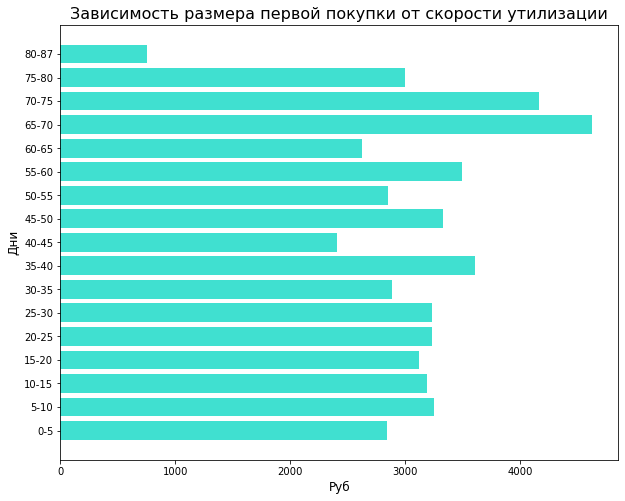

In [42]:
# Строим график
fig, ax = plt.subplots(figsize = (10,8))

ax.barh(df2_final.index, df2_final.purchase_amt, color = '#40E0D0')
plt.title('Зависимость размера первой покупки от скорости утилизации', fontsize = 16)
plt.ylabel('Дни',fontsize = 12)
plt.xlabel('Руб', fontsize = 12)
